    Ben Christensen
    Math 323
    April 12, 2018

In [1]:
import numpy as np

In [2]:
import numpy as np
from scipy import linalg as la
from time import time as time
from matplotlib import pyplot as plt


# Problems 1 and 3
def value_iteration(V_0, beta=.9, N=500, W_max=1, u=np.sqrt, tol=1e-6,
                    max_iter=500):
    """Perform VI according to the Bellman optimality principle

    Parameters:
        V_0 (ndarray) - The initial guess for the value function
        beta (float) - The discount rate (between 0 and 1)
        N (int) - The number of pieces you will split the cake into
        W_max (float) - The value of W_max
        u (function) - The utility function (u(0) = 0; u' > 0; u'' < 0; and lim_{c->0+} u'(c) = \inf)
        tol (float) - The stopping criteria for the value iteration
        max_iter (int) - An alternative stopping criteria

    Returns:
        V_final (ndarray) - The discrete values for the true value function (Problem 1)
        c (list) - The amount of cake to consume at each time to maximize utility (Problem 3)
    """
    w = np.arange(N+1) * W_max / N
    V_k1 = V_0
    #i=0
    #pi is the policy function
    pi = []
    for k in range(max_iter):
        #i+=1
        V_k = V_k1
        #Calculate V_k+1(w_i) for each w_i
        for i, amount in enumerate(w):
            to_maximize = [u(amount - prime) + beta*V_k[j] for j, prime in enumerate(w[w<=amount])]
            pi.append(np.argmax(to_maximize))
            V_k1[i] = np.max(to_maximize)
        if la.norm(V_k1 - V_k) < tol:
            break
    #print(pi)
    return V_k1, extract_policy_vector(w, np.array(pi))

# Problem 2
def extract_policy_vector(possible_W, policy_function):
    """Returns the policy vector that determines how much cake should be eaten at each time step

    Parameters:
        possible_W (ndarray) - an array representing the discrete values of W
        policy_function (ndarray) - an array representing how many pieces to leave at each state

    Returns:
        c (list) - a list representing how much cake to eat at each time period
    """
    #Initalize components
    #n is the amount of cake left
    N = len(possible_W) - 1
    n = N
    c = []
    while n > 0:
        #i is the amount of cake to eat
        i = n - policy_function[n]
        n -= i
        #Change number of slices to a percentage of the total cake
        c.append(i / N)

    return c

# Problem 4
def policy_iteration(pi_0, beta=.9, N=500, W_max=1, u=np.sqrt, max_iter=50):
    """Perform PI according to the Bellman optimality principle

    Parameters:
        pi_0 (array) - The initial guess for the Policy Function (0 <= pi_0(W) <= W)
        beta (float) - The discount rate (between 0 and 1)
        N (int) - The number of pieces you will split the cake into
            also acts as a cap for the number of steps required to calculate V_k at each iteration
        W_max (float) - The value of W_max
        u (function) - The utility function (u(0) = 0; u' > 0; u'' < 0; and lim_{c->0+} u'(c) = \inf)
        max_iter (int) - An alternative stopping criteria for the policy function updates

    Returns:
        V_final (ndarray) - The discrete values for the true value function
        c (list) - The amount of cake to consume at each time to maximize utility
    """

    #Initialize important variables
    w = np.arange(N+1) * W_max / N
    pi_k = pi_0
    V_k = np.ones_like(w)

    for k in range(max_iter):
        for i in range(N+1):
            #Calculate the recursive portion of V_k
            recursive = 0
            j = 1
            pi_holder = pi_k[w[i]]
            if pi_holder == 0:
                no_more_cake = True
            else:
                no_more_cake = False
            #Apply pi #t times
            while no_more_cake is False:
                recursive += beta**j * u(pi_holder - pi_k[w[pi_holder]])
                pi_holder = pi_k[w[pi_holder]]
                j+= 1
                if pi_holder == 0:
                    no_more_cake = True
            V_k[i] = u(w[i] - pi_k[w[i]]) + recursive
            #Calculate new pi_k
            for m in range(N+1):
                pi_k1[i] = np.argmax([u(w[i] - prime) + beta*V_k[j] for j, prime in enumerate(w[w<=w[i]])])

        if la.norm(pi_k1 - pi_k) < tol:
            break
        pi_k = pi_k1


    return V_k, extract_policy_vector(w, pi_k1)

# Problem 5
def compare_methods():
    """
    Solve the cake eating problem with each method, VI, PI with various values of beta and compare how long each method takes.
    Each V_final should be np.allclose and each policy vector, c, should be identical for each both.
    Use N=1000 as the number of grid points for w and beta = [.95, .975, .99, .995].

    Graph the results for each method with beta on the x-axis and time on the y-axis.
    """
    #Initialize the problem
    N = 1000
    w = np.arange(N+1) * 1 / N
    Betas = [.95, .975, .99, .995]
    max_iter = 9000
    u = np.sqrt
    V0 = u(w)
    pi0 = np.copy(w)
    pi0 = np.insert(w, 0, 0)[0:-1]
    times = []
    for Beta in Betas:
        start = time()
        #run value iteration for each beta
        value_iteration(V0, beta=Beta, N=N, max_iter = max_iter)
        end = time()
        times.append(end-start)
    #graph the times
    plt.semilogx(Betas, times)
    plt.xlabel("β Values")
    plt.ylabel("Time (seconds)")
    plt.show()

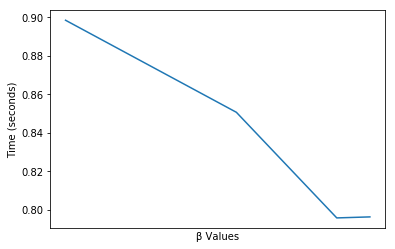

In [6]:
compare_methods()